# Projet Régression Logistique

## Données : diabetes

Le projet de régression logistique consiste à réaliser un modèle de régression logistique à partir d'une table de données.
La table de données provient du site Kaggle et contient des informations de santé concernant des individus.
Ici, le projet consiste à réaliser un modèle de régression logistique censé déterminer si un individu quelconque est diabétique ou non.

Notre table de données contient 768 individus et 9 variables :
- Pregnancies : le nombre de grossesses
- Glucose : le taux de glucose
- BloodPressure : le niveau de pression sanguine
- SkinThickness : l'épaisseur de la peau
- Insulin : le taux d'insuline
- BMI : l'indice de masse corporelle
- DiabetesPedigreeFunction
- Age
- Outcome : vaut 1 si l'individu est déclaré diabétique, 0 sinon

L'ensemble de ces variables sont des variables quantitatives, à l'exception de la variable "Outcome" qui est une variable categorielle(binaire) mais aussi la variable cible.

In [1]:

import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sb

In [4]:
import scipy.stats as stats

In [5]:
import statsmodels.api as sm

In [6]:
from statsmodels.formula.api import ols

In [7]:
diabete = pd.read_csv('diabetes2.csv',sep=',',decimal='.')

Voici un aperçu de la table de données

In [8]:
diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Sur cette table, nous avons procédé à différentes analyses en vue de mettre en place un modèle de régression logistique

## Présence de valeurs manquantes/aberrantes ?

Avant de procéder aux analyses statistiques sur notre table, nous nous sommes interrogés sur la présence ou non de valeurs aberrantes voire manquantes.
Lors de la lecture de la table, nous avons constaté la présence de plusieurs zéros qui semblent être des valeurs aberrantes dans le cas de ces variables :
- Glucose => absence de glucose ?
- BloodPressure => pas de pression sanguine chez l'individu ?
- SkinThickness => absence de peau ?
- BMI => l'individu pèserait 0 kilogrammes ?

La première idée à laquelle nous avons pensé était de supprimer les individus concernées par ces valeurs, ce qui serait revenu à supprimer environ un quart des données de la table.
Comme cela revient à supprimer un nombre trop important de données, et donc d'informations, nous avons choisi d'émettre l'hypothèse qu'il s'agit de valeurs manquantes.
Nous avons finalement choisi de conserver ces valeurs manquantes car nous avons pensé que les informations en question n'ont pas pu être enseignés lors de l'examen de l'individu.

## Tableau de statistiques descriptives

Comme précisé précédemment, nous allons procéder à réaliser deux analyses statistiques : 
- Une analyse univariée
- Une analyse bivariée

Mais avant de procéder à l'analyse univariée, nous vons présentons un tableau de statistiques descrptives de l'ensemble des variables (à l'exception de la variable "Outcome" car il s'agit pour rappel d'une variable catégorielle). Pour cela, on va construire deux variables X et Y qui contiennent respectivement les variables explicatives et la variable cible.

In [9]:
X = diabete.drop('Outcome',axis=1)

In [10]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
Y = diabete['Outcome']

## Analyse univariée

L'analyse univariée consiste à analyser les données d'une seule variable.

Cependant, il faut savoir à quel type de données nous avons à faire avant de faire cette analyse.
Pour l'ensemble des variables, l'analyse est déjà faite à l'exception des variables Pregnancies, Age et Outcome.
En effet, ces trois variables ont la particularité de présenter en soi les nombres entiers : on peut donc y faire pour chacune d'entre elles un tableau recensant les occurences de leurs valeurs présentes.

### Pregnancies 

In [12]:
X.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### Age

In [13]:
X.Age.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

### Outcome

In [14]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Analyse bivariée 

Maintenant que nous avons fait l'analyse univariée, on peut procéder à l'analyse bivariée.

Pour cela, nous avons construit une matrice de corrélations qui renseigne les coefficients de corrélation entre chaque variable. Ici, nous avons d'abord fait une matrice "classique" qui recense les coefficients de corrélation, puis nous en avons réalisé une autre version avec un code couleur afin de mieux mettre en avant les niveaux de corrélation.

In [15]:
diabete.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


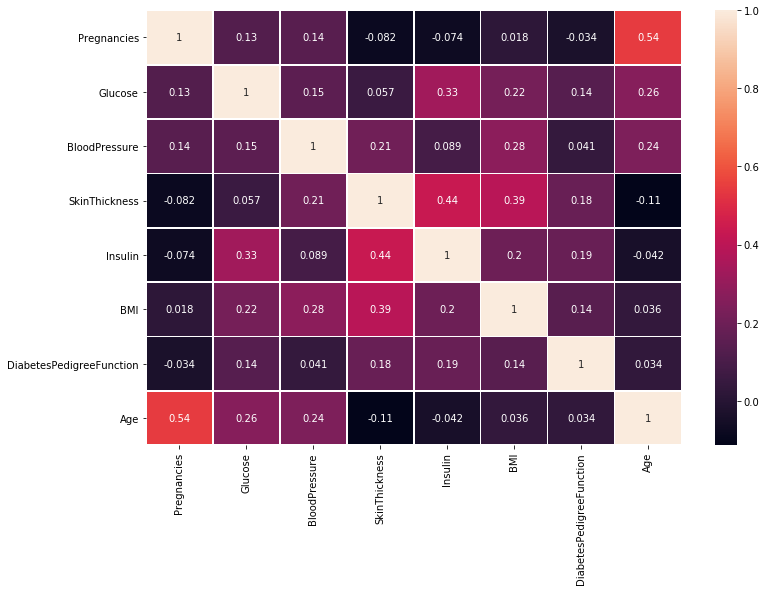

In [16]:
plt.subplots(figsize =(12,8))
sb.heatmap(X.corr(),linewidth=0.75, annot=True)

Dans l'ensemble, les coefficients de corrélation entre variables explicatives sont proches de 0, ce qui signifie qu'il n'y a pas vraiment de corrélation entre elles. Le coefficient de corrélation le plus élevé est égal à 0.56 et on l'obtient pour les variables Age et Pregnancies. On obtient aussi un coefficient de 0.42 entre Insulin et SkinThickNess et 0.39 entre SkinThickNess et BMI.

Après la matrice de corrélations, on décide de faire une analyse de la variance ANOVA afin de savoir quelle(s) variable(s) explicative(s) aurait une influence sur le diagnostic du patient.

In [17]:
diabete_lm = ols('Outcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age',
                 data=diabete).fit()

In [18]:
resultat = sm.stats.anova_lm(diabete_lm, type = 1)
resultat

,df,sum_sq,mean_sq,F,PR(>F)
Pregnancies,1.0,8.591143,8.591143,53.638189,6.164705e-13
Glucose,1.0,34.020758,34.020758,212.406175,1.327103e-42
BloodPressure,1.0,0.123476,0.123476,0.770911,3.802132e-01
SkinThickness,1.0,0.863789,0.863789,5.393003,2.048132e-02
Insulin,1.0,0.255349,0.255349,1.594251,2.071077e-01
BMI,1.0,6.780158,6.780158,42.331432,1.398272e-10
DiabetesPedigreeFunction,1.0,1.817752,1.817752,11.349002,7.929848e-04
Age,1.0,0.458924,0.458924,2.865257,9.092163e-02
Residual,759.0,121.567819,0.160168,NaN,NaN


D'après l'analyse de la variance (ANOVA) entre la variable dépendante et les variables explicatives, on observe que la variable cible semble dépendante de certaines variables explicatives car leur p-value est inférieure à 5%. Il s'agit des variables Pregnancies, Glucose, SkinThickNess, BMI et DiabetesPedigreeFunction.

Les variables pour lesquels il y aurait indépendance sont BloodPressure (38%), Insulin (20,7%) et Age (9,1%)

### Quels sont les caracteristiques des individus detectés diabetiques ??

In [19]:
# On veut savoir les caracteristiques d'un individu diabetique 

logit = sm.Logit(Y,X)
result =logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.059     
Dependent Variable:    Outcome            AIC:                950.6528  
Date:                  2020-01-09 23:31   BIC:                987.8031  
No. Observations:      768                Log-Likelihood:     -467.33   
Df Model:              7                  LL-Null:            -496.74   
Df Residuals:          760                LLR p-value:        2.5825e-10
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1284   0.0286  4.4843 0

#### On observe que les variables Age,BloodPressure et BMI ont des coefficients negatifs .
On peut dire les individus jeunes ont tendance à ne pas etre detecté diabetique .
Plus l'IMC de l'individu est faible ,moins il a de chance d'etre detecté diabetique
La pression sanguine diminue avec le fait d'etre detecté diabetique.

#### Par contre les variables Pregnancies ,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction augmentent avec la detection d'un individu d'etre diabetique car leurs  coefficients  sont positifs.


## La Modèlisation du problème par la regression logistique

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [50]:

from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
result = clr.fit(X_train,y_train)
#y_pred = clr.predict(X_train)

coef =dict(zip(X, zip(clr.coef_[0])))
coef


D:\Candidature\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Pregnancies': (0.08347957154318052,),
 'Glucose': (0.02556334967630502,),
 'BloodPressure': (-0.01649128759693577,),
 'SkinThickness': (0.005591279919133822,),
 'Insulin': (-0.0005385380352512718,),
 'BMI': (0.054320396632537335,),
 'DiabetesPedigreeFunction': (0.6034481199408349,),
 'Age': (0.012353351475104394,)}

In [29]:
print(X_test.shape)
print(y_test.shape)

(192, 8)
(192,)


In [24]:
coef = dict(zip(X, zip(result.coef_[0])))
coef

{'Pregnancies': (0.08347957154318052,),
 'Glucose': (0.02556334967630502,),
 'BloodPressure': (-0.01649128759693577,),
 'SkinThickness': (0.005591279919133822,),
 'Insulin': (-0.0005385380352512718,),
 'BMI': (0.054320396632537335,),
 'DiabetesPedigreeFunction': (0.6034481199408349,),
 'Age': (0.012353351475104394,)}

### Matrice de Confusion

La premiere façon de regarder si le modele a marché est la matrice de confusion

In [30]:
from sklearn.metrics import confusion_matrix 
conf = confusion_matrix(y_test, clr.predict(X_test))
conf



array([[119,  11],
       [ 26,  36]], dtype=int64)

Les coefficients sur la diagonale indique les éléments bien classés, les coefficients en dehors de ceux que le classifieur a mis dans la mauvaise classe.

In [43]:
y_pred = clr.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
clr.decision_function(X_test)

array([ 2.14773061, -1.30441583, -1.80731963,  0.41797441, -1.57015862,
       -2.49524964,  0.79966756,  1.09264461, -0.23113976, -0.50730921,
        0.22813894,  2.1776877 , -0.8363194 , -1.10436156, -1.56342479,
       -1.3488406 ,  1.42273594, -2.613871  , -0.43783175, -0.76515638,
        0.27112739, -0.58118181, -0.5885395 , -2.25568115, -2.1442086 ,
       -0.49622661, -2.36377505,  1.61904441, -1.54888174, -1.38617168,
       -0.10719806, -0.92191723, -1.8810274 , -0.06508541, -1.54098762,
        0.578424  , -0.10495612, -1.89444123, -0.41833102,  0.7768305 ,
       -0.79816559, -1.27221958, -1.17750346,  1.09988322,  0.96130672,
       -3.34946091, -1.69362851, -0.94827704, -0.43802862, -0.83169667,
       -0.28073834, -1.04248569,  1.5196482 , -0.16572404, -1.47645157,
       -4.35157452, -2.08349499, -0.36666779, -0.83415486, -1.15058672,
        0.54157789, -0.10119248, -1.65381251,  0.91815538,  0.45255381,
        1.63757871,  0.50366299, -1.47364221, -0.40683648, -1.65

In [54]:
proba = clr.predict_proba(X_test)

array([[0.10454348, 0.89545652],
       [0.78657722, 0.21342278],
       [0.85903762, 0.14096238],
       [0.39700156, 0.60299844],
       [0.82780622, 0.17219378],
       [0.92380813, 0.07619187],
       [0.31009664, 0.68990336],
       [0.25112061, 0.74887939],
       [0.55752904, 0.44247096],
       [0.62417548, 0.37582452],
       [0.44321136, 0.55678864],
       [0.10177211, 0.89822789],
       [0.69768947, 0.30231053],
       [0.75107644, 0.24892356],
       [0.82684424, 0.17315576],
       [0.79394002, 0.20605998],
       [0.19423303, 0.80576697],
       [0.93174898, 0.06825102],
       [0.60774226, 0.39225774],
       [0.68247219, 0.31752781],
       [0.43263034, 0.56736966],
       [0.6413393 , 0.3586607 ],
       [0.64302997, 0.35697003],
       [0.90513945, 0.09486055],
       [0.89512635, 0.10487365],
       [0.62157216, 0.37842784],
       [0.91402293, 0.08597707],
       [0.1653367 , 0.8346633 ],
       [0.82475216, 0.17524784],
       [0.79998037, 0.20001963],
       [0.

In [57]:
score = clr.predict_proba(X_test)
dfsc = pandas.DataFrame(score, columns=['score'])
dfsc['Diabetique'] = y_test
dfsc.head()

,score,Diabetique
0,2.147731,NaN
1,-1.304416,0.0
2,-1.807320,1.0
3,0.417974,NaN
4,-1.570159,NaN


In [59]:
dfsc = pandas.DataFrame(score, columns=['score'])
dfsc['Diabetique'] = y_test.values
dfsc.head()

,score,Diabetique
0,2.147731,1
1,-1.304416,0
2,-1.807320,0
3,0.417974,1
4,-1.570159,0


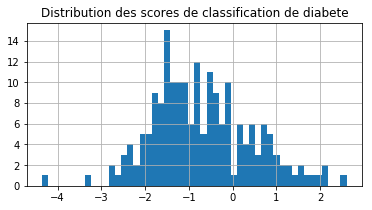

In [60]:
ax = dfsc['score'].hist(bins=50, figsize=(6,3))
ax.set_title('Distribution des scores de classification de diabete');

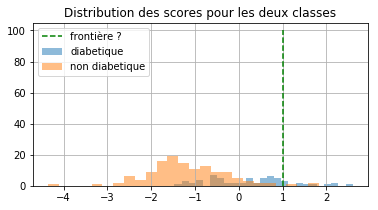

In [64]:
ax = dfsc[dfsc['Diabetique'] == 1]['score'].hist(bins=25, figsize=(6,3), label='diabetique', alpha=0.5)
dfsc[dfsc['Diabetique'] == 0]['score'].hist(bins=25, ax=ax, label='non diabetique', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 100], 'g--', label="frontière ?")
ax.legend();

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
probas = clr.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0], pos_label=clr.classes_[0], drop_intermediate=False)
fpr0.shape

(193,)

In [73]:
dftp = pandas.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0)).copy()
dftp.head(n=2)

,fpr,tpr,threshold
0,0.0,0.000000,1.987277
1,0.0,0.007692,0.987277


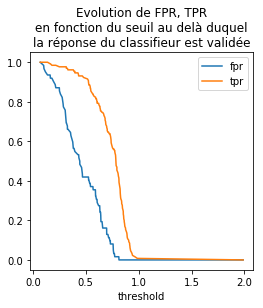

In [74]:
ax = dftp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(4, 4))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" +
             "la réponse du classifieur est validée");

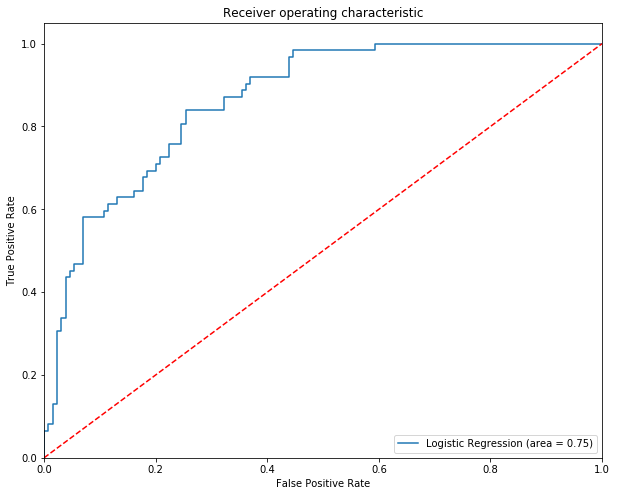

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Calculate ROC Values

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clr.predict_proba(X_test)[:,1])
# Plot ROC Curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


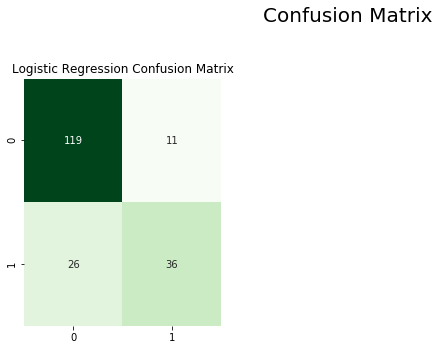

In [70]:
plt.figure(figsize=(12,10))

plt.suptitle("Confusion Matrix",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sb.heatmap(conf,cbar=False,annot=True,cmap="Greens",fmt="d")


In [25]:
diabete['TrancheAge'] = pd.cut(diabete['Age'], 6)
diabete[['TrancheAge','Outcome']].groupby(['TrancheAge'], as_index=False).sum().sort_values(by='TrancheAge', ascending=True)


,TrancheAge,Outcome
0,"(20.94, 31.0]",103
1,"(31.0, 41.0]",76
2,"(41.0, 51.0]",56
3,"(51.0, 61.0]",27
4,"(61.0, 71.0]",6
5,"(71.0, 81.0]",0
